# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

Nazwa zespołu: IAD12
Członkowie: Izabela Karczewska 409957, Natalia Kołodziejczyk 409695, Natalia Kubańska 411933

## Zestaw zadań 3: Elementy statystyki opisowej 3 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Poniższy kod wczytuje do zmiennych `daily_bike_traffic_data` oraz `weather_data` dane z przygotowanych wcześniej plików daily_bike_traffic_data.pkl i weather_data.pkl.

In [3]:
# Ruch rowerowy
daily_bike_traffic_data = pd.read_pickle("daily_bike_traffic_data.pkl")
daily_bike_traffic_data

,Total,East,West
Date,,,
2022-01-01,33.0,23.0,10.0
2022-01-02,37.0,20.0,17.0
2022-01-03,253.0,93.0,160.0
2022-01-04,577.0,220.0,357.0
2022-01-05,713.0,261.0,452.0
...,...,...,...
2022-12-27,429.0,181.0,248.0
2022-12-28,1108.0,449.0,659.0
2022-12-29,687.0,261.0,426.0


In [4]:
# Pogoda
weather_data = pd.read_pickle("weather_data.pkl")
weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                   Sky  
           Avg speed Max speed Cloud cover  
Date                                        
2022-01-01  3.576320   5.36448         0.8  
2022-01-02  3.799840   8.94080         1.0  
2022-01-03  5.140960  11.62304         0.9  
2022-01-04  4.336288   9.83488         0.9  
2022-01-05  2.235200   4.47040         1.0  
...              ...       ...         ...  
2022-12-27  7.733792  16.54048         1.0  
2022-12-28  5.766816  12.51712         0.8  
2022-12-29  2.771648   7.59968         1.0  
2022-12-30  6.437376  11.62304         0.9  
2022-12-31  4.470400   9.38784         0.9  

[365 rows x 9 columns]

### Zadnie 4: Analiza korelacji [10 pkt]

#### a) Korelacje liniowe pomiędzy parametrami pogody a liczbą rowerzystów

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_1` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_1` pomiędzy wartościami parametrów pogody, a liczbą rowerzystów przejeżdżających przez most danego dnia.

Tablice powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data` </br>

> Kolumny: zestaw indeksów identycznych z nazwami kolumn tablicy `daily_bike_traffic_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [5]:
# Tabela R
weather = weather_data.droplevel(0, axis=1)
R_corr_1 = pd.DataFrame(columns = daily_bike_traffic_data.columns, index = weather_data.columns)
for i, column in enumerate(weather):
    R_corr_1.iloc[i:] = daily_bike_traffic_data.corrwith(weather[column])

display(R_corr_1.style.format(precision = 3))

In [6]:
# Tabela R^2
R2_corr_1 =R_corr_1**2
display(R2_corr_1.style.format(precision = 3))

In [7]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_1.loc[("Temperature", "Min"), "Total"], 0.7016549936827619)
assert np.isclose(R_corr_1.loc[('Snow', 'Fall'), "East"], -0.1513545851889312)
assert np.isclose(R_corr_1.loc[('Wind', 'Max speed'), "West"], -0.3394814202230162)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_1.loc[("Temperature", "Avg"), "Total"], 0.5941735252448272)
assert np.isclose(R2_corr_1.loc[("Precipitation", "Total"), "East"], 0.21602605629121266)
assert np.isclose(R2_corr_1.loc[("Sky", "Cloud cover"), "West"], 0.3012666920823503)

Text(1340.0404040404037, 0.5, 'Weather Features')

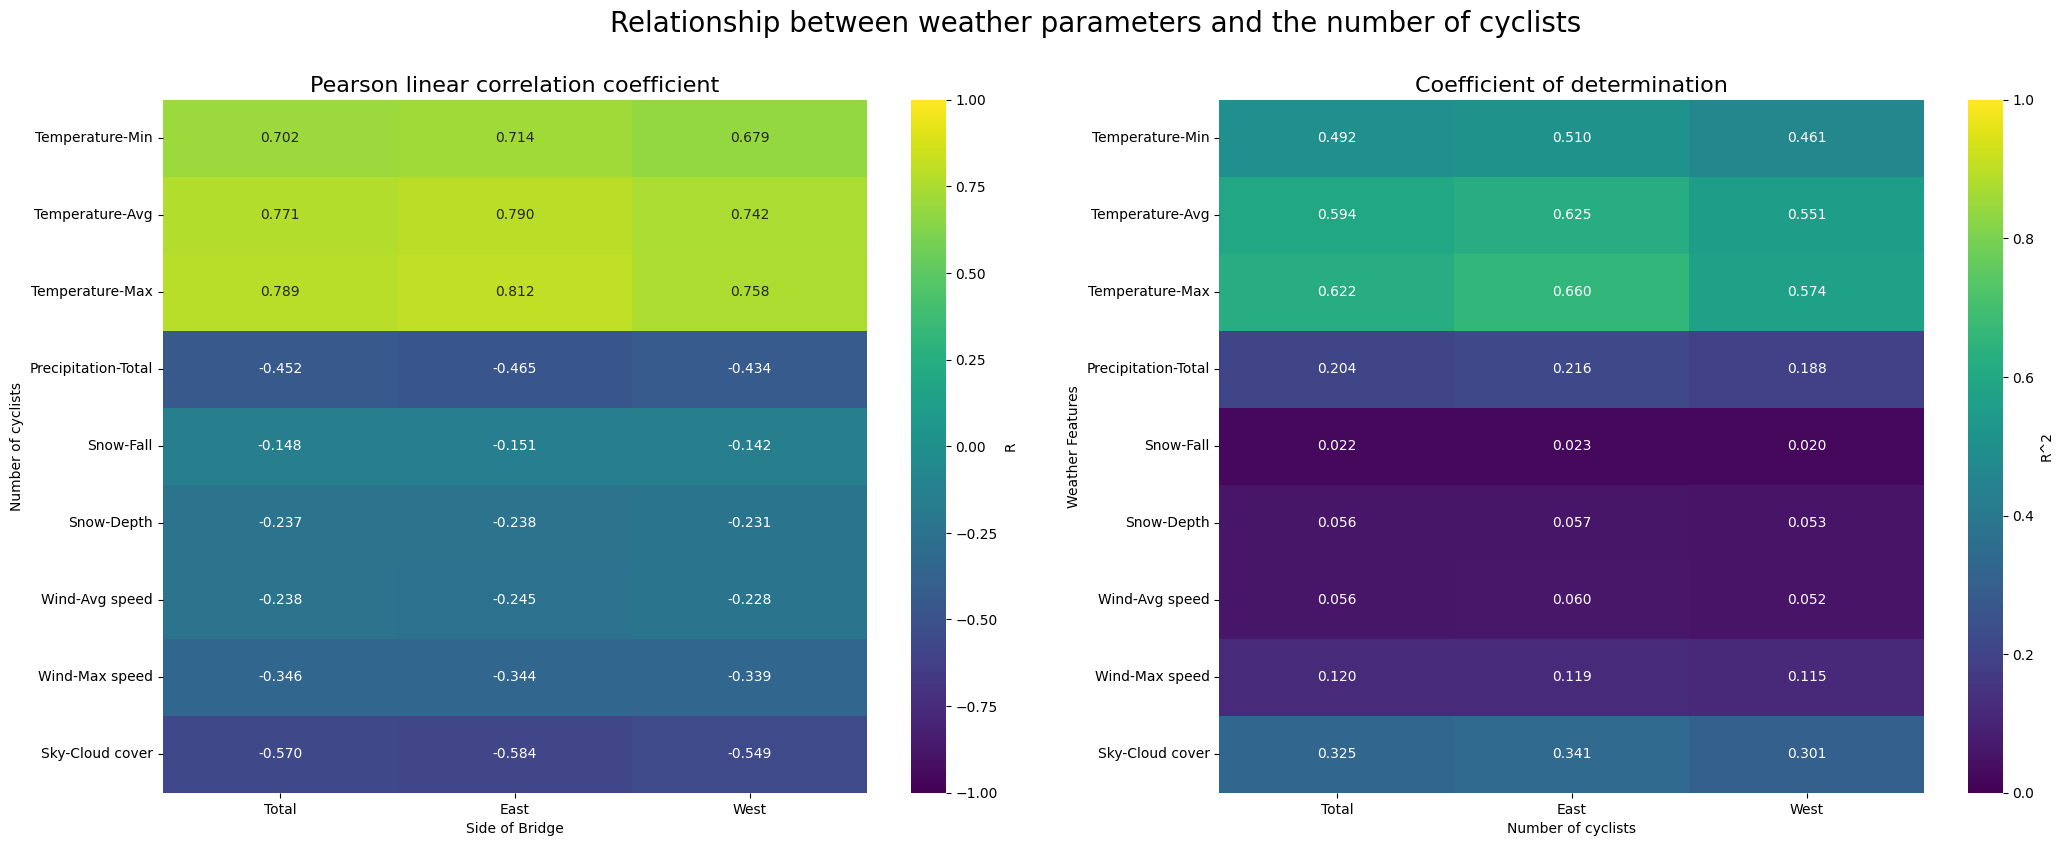

In [8]:
# Wykresy
fig, ax = plt.subplots(1, 2, figsize=(25, 9))
fig.suptitle('Relationship between weather parameters and the number of cyclists ', fontsize = 20)
sns.heatmap(data=R_corr_1.astype(float), ax=ax[0], fmt=".3f", cmap='viridis', cbar_kws={'label': 'R'}, annot=True, vmin=-1, vmax=1)
ax[0].set_title("Pearson linear correlation coefficient", fontsize=16)
ax[0].set_xlabel("Side of Bridge")
ax[0].set_ylabel("Number of cyclists")

sns.heatmap(data=R2_corr_1.astype(float), ax=ax[1], fmt=".3f", cmap='viridis', cbar_kws={'label': 'R^2'}, annot=True, vmin=0, vmax=1)
ax[1].set_title("Coefficient of determination", fontsize=16)
ax[1].set_xlabel("Number of cyclists")
ax[1].set_ylabel("Weather Features")

#### b) Korelacje liniowe między parametrami pogody

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_2` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_2` pomiędzy wartościami parametrów pogody.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
    > Kolumny: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [9]:
# Tablica R
R_corr_2 = weather_data.corr()
display(R_corr_2.style.format(precision=3))

In [10]:
# Tablica R^2
R2_corr_2 = R_corr_2**2
display(R2_corr_2.style.format(precision=3))

In [11]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_2.loc[("Temperature", "Avg"), ('Snow', 'Fall')], -0.15332754676249075)
assert np.isclose(R_corr_2.loc[("Precipitation", "Total"), ("Wind", "Max speed")], 0.27117268223209673)
assert np.isclose(R_corr_2.loc[("Sky", "Cloud cover"), ("Temperature", "Max")], -0.6248338895216168)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_2.loc[("Snow", "Depth"), ("Wind", "Max speed")], 0.004732081693920376)
assert np.isclose(R2_corr_2.loc[("Temperature", "Min"), ("Temperature", "Avg")], 0.9373738975008452)
assert np.isclose(R2_corr_2.loc[("Precipitation", "Total"), ("Sky", "Cloud cover")], 0.12532191894477251)

[Text(0.5, 0, 'Temperature-Min'),
 Text(1.5, 0, 'Temperature-Avg'),
 Text(2.5, 0, 'Temperature-Max'),
 Text(3.5, 0, 'Precipitation-Total'),
 Text(4.5, 0, 'Snow-Fall'),
 Text(5.5, 0, 'Snow-Depth'),
 Text(6.5, 0, 'Wind-Avg speed'),
 Text(7.5, 0, 'Wind-Max speed'),
 Text(8.5, 0, 'Sky-Cloud cover')]

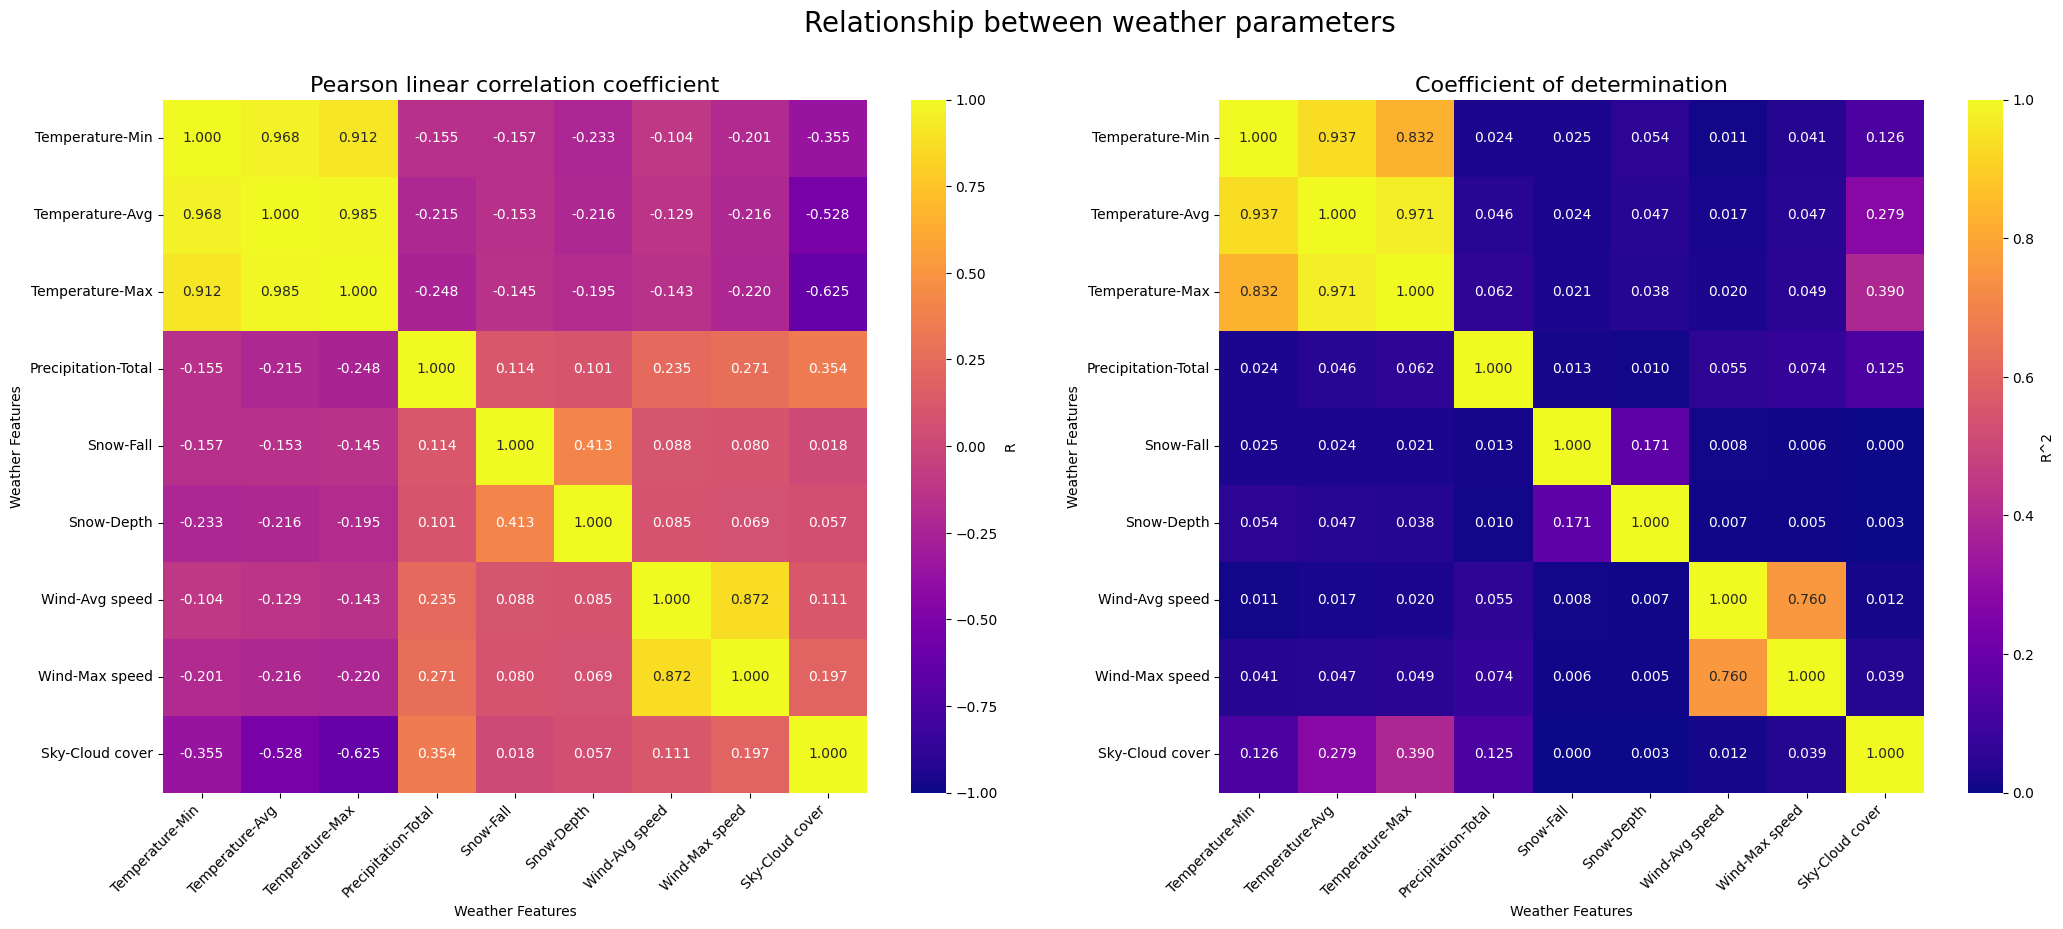

In [12]:
# Wykresy
fig, ax = plt.subplots(1, 2, figsize=(25, 9))
fig.suptitle('Relationship between weather parameters', fontsize = 20)
sns.heatmap(data=R_corr_2.astype(float), ax=ax[0], fmt=".3f", cmap='plasma', cbar_kws={'label': 'R'}, annot=True, vmin=-1, vmax=1)
ax[0].set_title("Pearson linear correlation coefficient", fontsize=16)
ax[0].set_xlabel("Weather Features")
ax[0].set_ylabel("Weather Features")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.heatmap(data=R2_corr_2.astype(float), ax=ax[1], fmt=".3f", cmap='plasma', cbar_kws={'label': 'R^2'}, annot=True, vmin=0, vmax=1)
ax[1].set_title("Coefficient of determination", fontsize=16)
ax[1].set_xlabel("Weather Features")
ax[1].set_ylabel("Weather Features")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

### Zadnie 5: Analiza regresji [25 pkt]

#### a) Regresja liniowa

Korzystając z funkcji `scipy.stats.linregress()` przygotuj tablicę `regression_data_1` zawierającą wartości współczynników równania regresji liniowej pomiędzy wartościami parametrów pogody (zmienna niezależna, objaśniająca), a liczbą rowerzystów przejeżdżających przez most danego dnia (zmienna zależna, objaśniana).

- Tablica powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy weather_data</br>
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie prostymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [13]:
# Tabela
regression_data_1 = pd.DataFrame(index = weather_data.columns, columns = pd.MultiIndex.from_product([['Total','East',  'West'], ['a', 'b']]))

for i, col_w in enumerate(weather.columns):
    values = []
    for col_d in daily_bike_traffic_data.columns:
        temp = pd.concat([weather[col_w], daily_bike_traffic_data[col_d]], axis=1).dropna()
        values.append(sp.stats.linregress(temp.iloc[:,0], temp.iloc[:,1]).slope)
        values.append(sp.stats.linregress(temp.iloc[:,0], temp.iloc[:,1]).intercept)
    regression_data_1.iloc[i,:] = values
    
regression_data_1.style.format(precision=3)

In [14]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_1
assert np.isclose(regression_data_1.loc[("Temperature", "Avg"), ('Total', 'a')], 118.37455627981312)
assert np.isclose(regression_data_1.loc[("Snow", "Depth"), ('Total', 'b')], 2219.810729613734)
assert np.isclose(regression_data_1.loc[("Wind", "Avg speed"), ('East', 'a')], -74.72308463717329)
assert np.isclose(regression_data_1.loc[("Precipitation", "Total"), ('East', 'b')], 956.7960528263079)
assert np.isclose(regression_data_1.loc[("Temperature", "Min"), ('West', 'a')], 77.54619929276554)
assert np.isclose(regression_data_1.loc[("Wind", "Max speed"), ('West', 'b')], 1970.6955983993344)

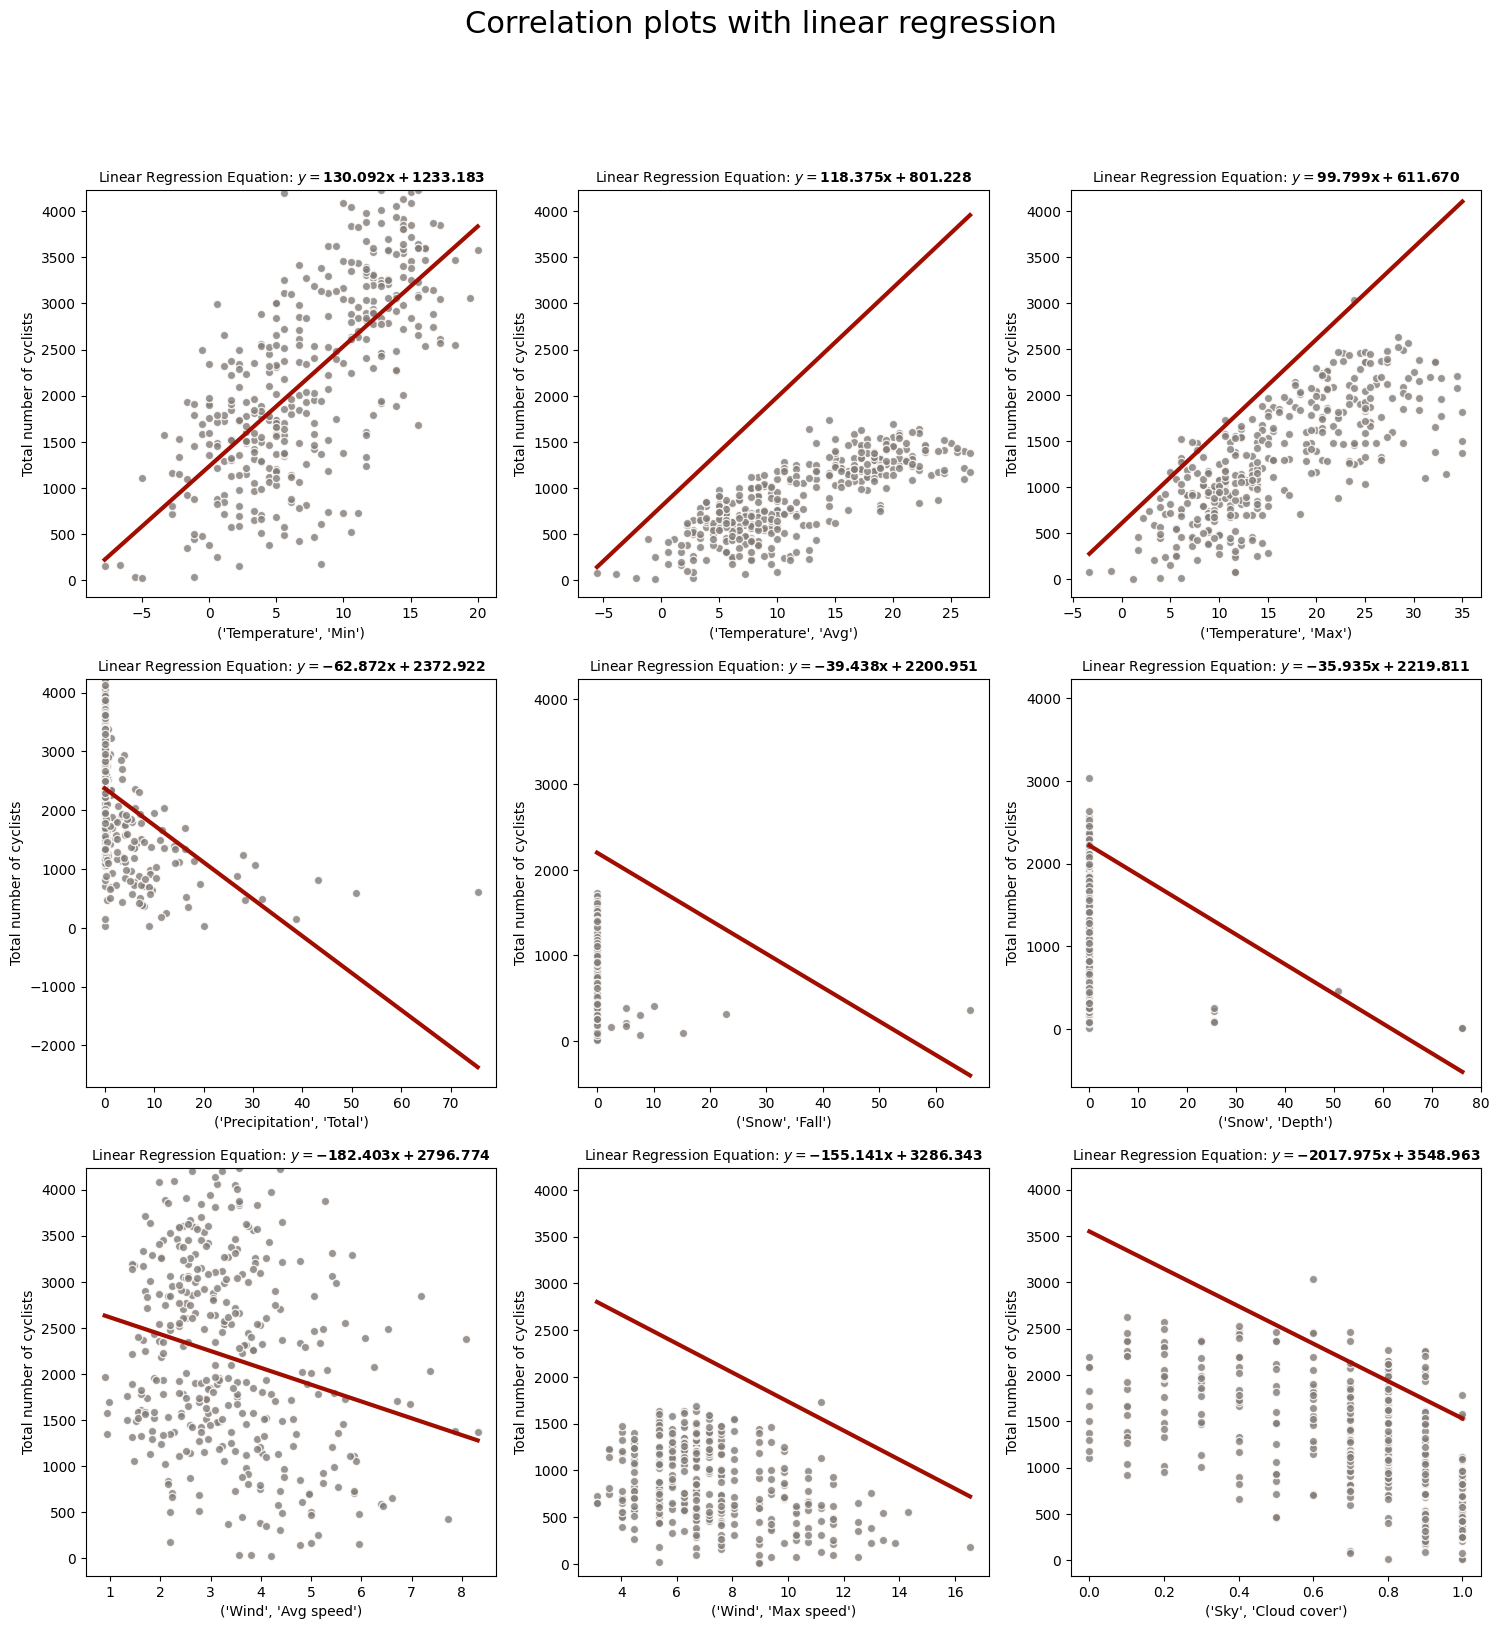

In [15]:
# Wykresy
fig, axes = plt.subplots(3, 3, figsize=(18,18))
fig.suptitle("Correlation plots with linear regression", fontsize=22)
axes=axes.flatten()

for i in range(len(regression_data_1)):
    par = regression_data_1.iloc[i,0:2]
    axes[i].scatter(weather_data.iloc[:,i], daily_bike_traffic_data.iloc[:, i%3], c="#827b76", alpha=0.8, edgecolors='w')
    x = np.linspace(weather_data.iloc[:,i].min(), weather_data.iloc[:,i].max())
    axes[i].plot(x, x*par.iloc[0]+par.iloc[1], c="#a10d00", linewidth=3)
    axes[i].set_title(fr"Linear Regression Equation: $y = \bf{{{par.iloc[0]:.3f}}}x + \bf{{{par.iloc[1]:.3f}}}$", fontsize=10)
    axes[i].set_xlabel(weather_data.iloc[:,i].name)
    axes[i].set_ylabel("Total number of cyclists")
    axes[i].set_ylim(top=daily_bike_traffic_data.max().max())


#### b) Regresja krzywoliniowa

Pobieżna analiza wykresów przygotowanych we wcześniejszym podpunkcie pokazuje, że w kilku przypadkach relacje między zmiennymi są bardziej skomplikowane i prosta regresja liniowa nie jest dobrym przybliżeniem obserwowanego trendu.

Korzystając z funkcji `scipy.optimize.curve_fit()` przygotuj tablicę `regression_data_2` zawierającą współczynniki równań regresji między zachmurzeniem, a liczbą rowerzystów przejeżdżających przez most danego dnia oraz między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia. W obu przypadkach skorzystaj z następującego równania regresji:
$$ y = a e^{-bx} + c$$ 
gdzie: a, b, c - współczynniki równania dobierane metodą najmniejszych kwadratów.

W przypadku regresji między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia ustaw parametry funkcji w taki sposób, aby wartość współczynnika c zawierała się w przedziale 90% - 110% wartości średniej liczby rowerzystów z 10 dni w roku z największą ilością opadów.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: </br>
    > 1 rzędu: Sky, Precipitation</br>
    > 2 rzędu: Cloud cover, Total (sparowane pojedynczo z odpowiadającymi im indeksami 1 rzędu tak jak w nazwach kolumn tablicy `weather_data`)</br>    
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b, c (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy liczby wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie krzywymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [16]:
# Obliczenia i tablica
# YOUR CODE HERE

def func(x, a, b, c):
    bx = np.clip( -b * x, -20, 20)  # uniknięcie ostrzeżenia  RuntimeWarning: overflow encountered in exp
    return a * np.exp(bx) + c
    
regression_data_2 = pd.DataFrame(index = weather_data.columns[[8,3]], columns = pd.MultiIndex.from_product([['Total','East',  'West'], ['a', 'b', 'c']]))


top_days = weather_data.nlargest(10, ('Precipitation', 'Total')) 
mean_bikers = daily_bike_traffic_data.loc[top_days.index].mean()
c_min = 0.9 * mean_bikers
c_max = 1.1 * mean_bikers

values_1 = []
values_2 = []

for i, col_d in enumerate(daily_bike_traffic_data.columns):
    temp = pd.concat([weather_data[('Sky', 'Cloud cover')], daily_bike_traffic_data[col_d]], axis=1).dropna()
    popt, _ = sp.optimize.curve_fit(func, temp.iloc[:,0], temp.iloc[:,1])
    values_1.extend(popt)

    temp = pd.concat([weather_data[('Precipitation', 'Total')], daily_bike_traffic_data[col_d]], axis=1).dropna()
    popt, _ = sp.optimize.curve_fit(func, temp.iloc[:,0], temp.iloc[:,1], bounds=([-np.inf, -np.inf, c_min[col_d]], [np.inf, np.inf, c_max[col_d]]) )
    values_2.extend(popt)


regression_data_2.iloc[0,:] = values_1
regression_data_2.iloc[1,:] = values_2
regression_data_2.style.format(precision=3)

In [17]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_2
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'a')], 1897.3445607675376)
assert np.isclose(regression_data_2.loc[(("Sky", "Cloud cover")), ('East', 'b')], -3.5974646434134456)
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'c')], 697.29)

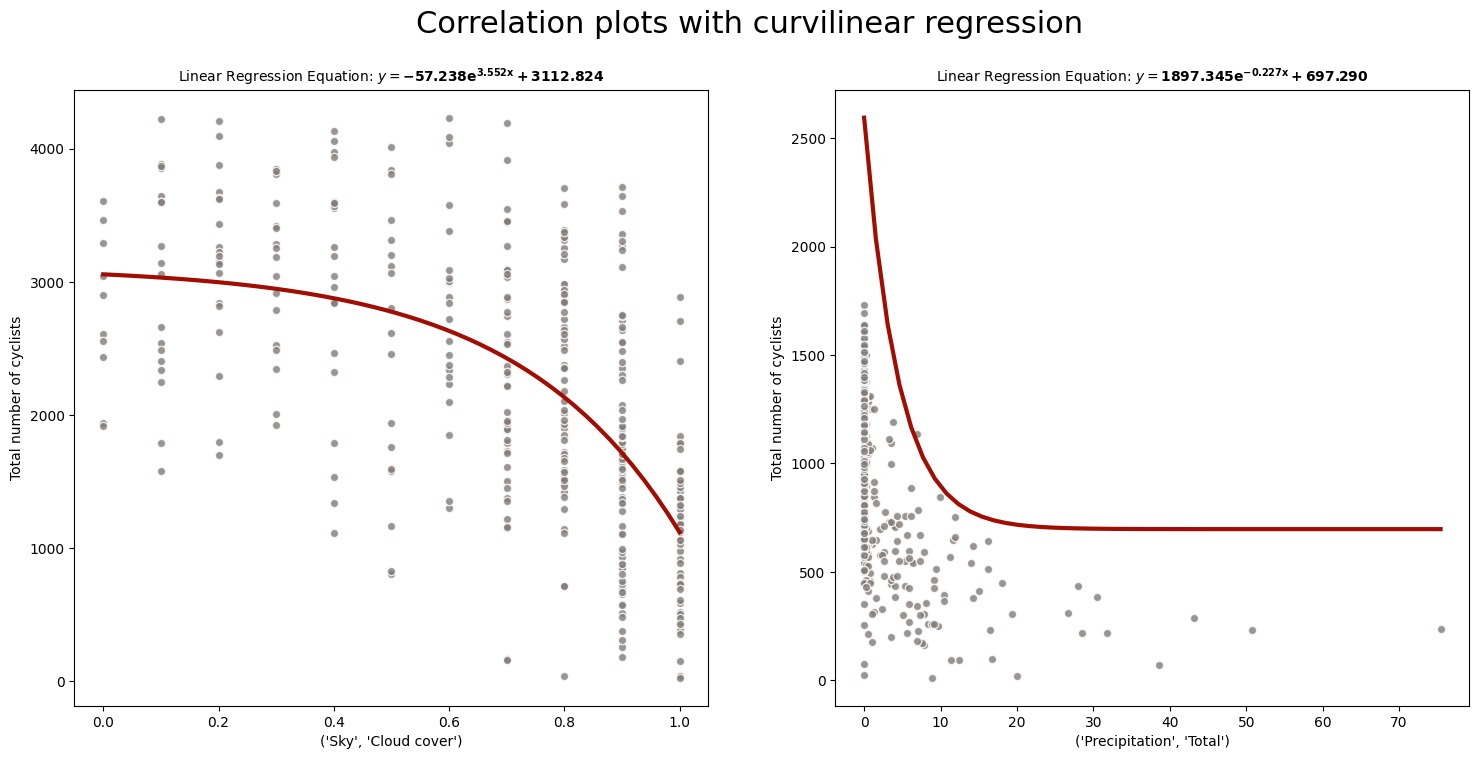

In [58]:
# Wykres
fig, axes = plt.subplots(1, 2, figsize=(18,8))
fig.suptitle("Correlation plots with curvilinear regression", fontsize=22)
for i in range(len(regression_data_2)):
    par = regression_data_2.iloc[i,0:3]
    axes[i].scatter(weather_data.loc[:,regression_data_2.index[i]], daily_bike_traffic_data.iloc[:, i], c="#827b76", alpha=0.8, edgecolors='w')
    axes[i].set_ylabel("Total number of cyclists")
    axes[i].set_xlabel(regression_data_2.index[i])
    axes[i].set_title(fr"Linear Regression Equation: $y = \bf{{ {par.iloc[0]:.3f} }}e^{{\bf{{ {-1*par.iloc[1]:.3f}x }} }}+ \bf{{ {par.iloc[2]:.3f} }}$", fontsize=10)
    x = np.linspace(weather_data.loc[:,regression_data_2.index[i]].min(), weather_data.loc[:,regression_data_2.index[i]].max())
    y = par.iloc[0]*np.exp(-par.iloc[1]*x)+par.iloc[2]
    axes[i].plot(x, y, c="#a10d00", linewidth=3)